<a href="https://colab.research.google.com/github/cindyvictoria01/19TI2/blob/master/UTS_Kelompok_Cindy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Tengah Semester - Frontier Technology - UPH Medan Campus - 2021

## PENTING :  Jawaban dikumpulkan dalam format *.ipynb dengan standar penamaan : NamaKelompok.ipynb 

### 1 Kelompok maksimal 2 orang - Tuliskan anggota kelompok ketika submit.

 
### Anggota Kelompok:
### - Cindy B. Victoria 03082190011
### - Cindy Leoni 03082190013
### 19TI2


## Case 01

### Amazon Web Services sebagai salah satu provider cloud terbesar menyediakan list CIDR Block alamat IP yang digunakan pada tiap region. List CIDR Block ini dapat diakses melalui URL : https://ip-ranges.amazonaws.com/ip-ranges.json

In [ ]:
import requests
resp = requests.get('https://ip-ranges.amazonaws.com/ip-ranges.json')
# API Response : status, headers, and body

#### Dari data tersebut anda diminta untuk menjawab beberapa pertanyaan berikut : 
#### 1. Berapa jumlah "region" dan "service" pada berdasarkan data tersebut?
#### 2. Berapa jumlah/total CIDR Blocks yang dialokasikan berdasarkan data tersebut?
#### 3. Lima Region mana yang memiliki alokasi CIDR Blocks paling sedikit?
#### 4. Sepuluh Region mana yang memiliki alokasi CIDR Blocks paling banyak? (Abaikan Region : "GLOBAL")
#### 5. Buatlah visualisasi dari 10 regions dengan alokasi IP paling banyak (Abaikan Region : "GLOBAL")
#### 6. Berapa jumlah CIDR blocks yang dialokasikan untuk wilayah Asia Pacific? (dimulai dari ap-)

## Solusi Case 01 : 

Jumlah dari tiap region (prefixes dan ipv6_prefixes)
                region
us-east-1         1225
us-west-2          594
us-west-1          534
eu-west-1          429
GLOBAL             386
us-east-2          377
eu-central-1       357
ap-southeast-1     348
ap-northeast-1     338
eu-west-2          319
sa-east-1          258
ap-southeast-2     230
ap-south-1         229
ap-northeast-2     183
eu-south-1         181
ca-central-1       177
eu-west-3          153
eu-north-1         151
ap-east-1          136
cn-north-1         127
af-south-1         125
ap-northeast-3     124
cn-northwest-1     120
me-south-1         111
ap-southeast-3      87
us-gov-west-1       85
eu-south-2          69
ap-southeast-4      67
us-gov-east-1       66
ap-south-2          65
me-central-1        59
eu-central-2        59
il-central-1        47
Total: region    33
dtype: int64


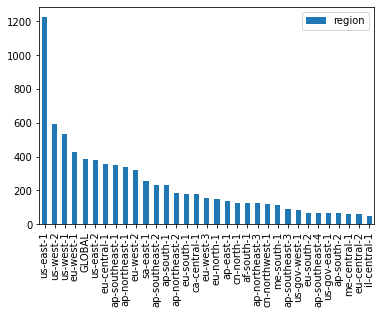


Jumlah dari tiap services (prefixes)
                                 service
AMAZON                              4140
EC2                                  833
ROUTE53_RESOLVER                     521
S3                                   220
API_GATEWAY                          137
CLOUDFRONT                           131
GLOBALACCELERATOR                     83
DYNAMODB                              79
CODEBUILD                             49
EBS                                   49
CLOUD9                                48
AMAZON_APPFLOW                        48
CLOUDFRONT_ORIGIN_FACING              44
WORKSPACES_GATEWAYS                   36
ROUTE53_HEALTHCHECKS_PUBLISHING       25
ROUTE53_HEALTHCHECKS                  23
EC2_INSTANCE_CONNECT                  20
KINESIS_VIDEO_STREAMS                 19
AMAZON_CONNECT                         9
CHIME_VOICECONNECTOR                   4
ROUTE53                                3
CHIME_MEETINGS                         1
Total: service    2

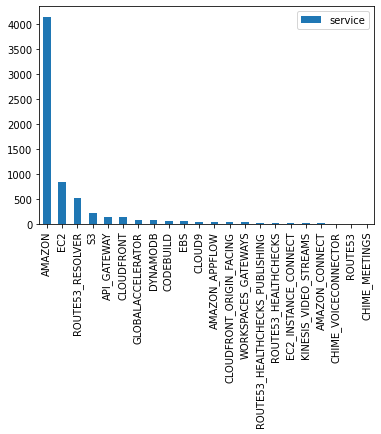


Jumlah dari tiap services (ipv6_prefixes)
                      service
AMAZON                    747
EC2                       308
S3                        193
CLOUDFRONT                 24
ROUTE53_HEALTHCHECKS       22
Total: service    5
dtype: int64


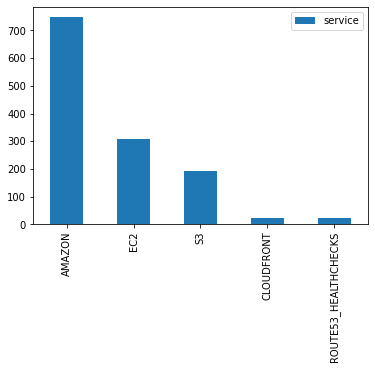

                region
GLOBAL             386
af-south-1         125
ap-east-1          136
ap-northeast-1     338
ap-northeast-2     183
ap-northeast-3     124
ap-south-1         229
ap-south-2          65
ap-southeast-1     348
ap-southeast-2     230
ap-southeast-3      87
ap-southeast-4      67
ca-central-1       177
cn-north-1         127
cn-northwest-1     120
eu-central-1       357
eu-central-2        59
eu-north-1         151
eu-south-1         181
eu-south-2          69
eu-west-1          429
eu-west-2          319
eu-west-3          153
il-central-1        47
me-central-1        59
me-south-1         111
sa-east-1          258
us-east-1         1225
us-east-2          377
us-gov-east-1       66
us-gov-west-1       85
us-west-1          534
us-west-2          594


In [ ]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import pandas as pd
import json
import re
from pandas import json_normalize

# convert data from json to dataframe
dict = json.loads(resp.text)
df1 = json_normalize(dict['prefixes'])
df2 = json_normalize(dict['ipv6_prefixes'])

# each region count (combine prefixes and ipv6_prefixes)
df_rcount = pd.DataFrame(df1.region.value_counts() + df2.region.value_counts())
df_rcount = df_rcount.sort_values(by='region', ascending=False)

# each service count (prefixes)
df1_scount = pd.DataFrame(df1.service.value_counts()) 
df1_scount = df1_scount.sort_values(by='service', ascending=False)

# each service count (ipv6_prefixes)
df2_scount = pd.DataFrame(df2.service.value_counts())
df2_scount = df2_scount.sort_values(by='service', ascending=False)

# no 1 - Jlh region & service
print("1. Total Region:")
print(df_rcount.count())
print("Total Service:")
print(df1_scount.count())
print("Total Service (ipv6):")
print(df2_scount.count())

# no 2 - Jlh CIDR Blocks
print('2. Jumlah CIDR Blocks: ', df_rcount.region.sum())

# no 3 - 5 Region CIDR paling sedikit
print('3. 5 Region yang memiliki alokasi CIDR Blocks paling sedikit:')
print(df_rcount.tail(5))

# no 4 - 10 Region CIDR terbanyak (excl. GLOBAL)
print('4. 10 Region yang memiliki alokasi CIDR Blocks paling banyak:')
global_regions = df_rcount[df_rcount.index.astype(str).str.contains('GLOBAL')].index
df_rcount.drop(global_regions, inplace = True)
print(df_rcount.head(10))

# no 5 - Visualisasi 10 Region CIDR terbanyak (excl. GLOBAL)
print('5. Visualisasi 10 regions dengan alokasi IP paling banyak')
df_rcount.head(10).plot.bar()
plt.show()

# no 6 - Asia Pacific
print("6. Jumlah CIDR blocks yang dialokasikan untuk wilayah Asia Pacific")
df_regions =  df_rcount.sort_index()
ap_regions = df_regions[df_regions.index.astype(str).str.contains('ap-')]
display(ap_regions)
print('Total CIDR: ')
print(ap_regions.sum())

## Case 02

### Pada kasus ini anda akan diberikan beberapa contoh data tentang pembelian yang dilakukan melalui eCommerce Amazon. Data tersebut dapat anda akses melalui URL berikut : https://uph-datasets.s3-ap-southeast-1.amazonaws.com/eCommerce.csv

In [ ]:
import pandas as pd
ecommerce_df = pd.read_csv("https://uph-datasets.s3-ap-southeast-1.amazonaws.com/eCommerce.csv")

#### Dari data tersebut anda diminta untuk menjawab beberapa pertanyaan berikut : 
#### 1. Berapa pekerjaan yang titlenya mengandung kata "engineer"?
#### 2. Berapa orang yang menggunakan bahasa Russia untuk mengakses website tersebut?
#### 3. Berapa jenis profesi pada data tersebut, 3 pekerjaan apa yang paling banyak, dan berapa diantaranya yang berprofesi sebagai pengacara (lawyer)?
#### 4. Apakah alamat email dari customer yang menggunakan Nomor Kartu Kredit : 4926535242672853 
#### 5. Penjualan lebih banyak terjadi pada pagi (AM) atau siang sd malam (PM)?
#### 6. Berapa orang menggunakan Kartu Kredit American Express dan berbelanja diatas 90 USD?
#### 7. Berapa orang yang kartu kreditnya expired di tahun 2023?
#### 8. Tiga domain email yang paling sering digunakan customer adalah : ______, _______, dan __________


## Solusi Case 02 :




In [ ]:
import pandas as pd
import re
from datetime import date, timedelta

ecommerce_df.rename(columns = {'Unnamed: 0':'idx'}, inplace = True)
sorted_df = ecommerce_df.sort_values(by='idx', ascending=True)

# no 1 - engineer
df_temp = sorted_df[sorted_df['Job'].str.contains('engineer')]
print('1. Total pekerjaan dengan title "engineer": ', df_temp['Job'].count())

# no 2 - rusia
df_temp = sorted_df[sorted_df['Language'].str.contains('ru')]
print('2. Jumlah orang yang menggunakan bahasa Russia untuk mengakses website: ', df_temp['Language'].count())

# no 3 - 3 job terbanyak & lawyer
df_job = sorted_df.Job.value_counts()
sorted_df_job = df_job.sort_values(ascending = False)
print('3. Jumlah jenis profesi: ', df_job.count())
print('Tiga Pekerjaan terbanyak:')
print(sorted_df_job.head(3))

# no 4 - email
df_temp = sorted_df[sorted_df['Credit Card'].astype(str).str.contains('4926535242672853')]
print('4. Alamat email dari customer yang menggunakan Nomor Kartu Kredit : 4926535242672853 adalah')
print(df_temp.Email)

# no 5 - AM or PM
print('5. Jumlah penjualan pada pagi (AM):')
df_temp = sorted_df[sorted_df['AM or PM'].str.contains('AM')]
print(df_temp['AM or PM'].count())
print('Jumlah penjualan pada siang sd malam (PM):')
df_temp = sorted_df[sorted_df['AM or PM'].str.contains('PM')]
print(df_temp['AM or PM'].count())

# no 6 - American Express & > 90 USD
print('6. Jumlah orang menggunakan Kartu Kredit American Express dan berbelanja diatas 90 USD')
df_temp = sorted_df[sorted_df['CC Provider'].str.contains('American Express')]
df_temp = df_temp[df_temp['Purchase Price'].gt(90)]
print(df_temp['Purchase Price'].count())

# no 7 - CC exp 2023
print('7. Jumlah orang yang kartu kreditnya expired di tahun 2023')
df_temp = sorted_df[sorted_df['CC Exp Date'].astype(str).str.contains('23')]
print(df_temp['CC Exp Date'].count())

# no 8 - Domain email
print('8. 3 domain email yang paling sering digunakan customer:')
df_temp = sorted_df['Email'].str.split('@').str[1]
print(df_temp.value_counts().head(3))

1. Total pekerjaan dengan title "engineer":  282
2. Jumlah orang yang menggunakan bahasa Russia untuk mengakses website:  575
3. Jumlah jenis profesi:  623
Tiga Pekerjaan terbanyak:
Lawyer                           21
Interior and spatial designer    20
Insurance claims handler         19
Name: Job, dtype: int64
4. Alamat email dari customer yang menggunakan Nomor Kartu Kredit : 4926535242672853 adalah
1975    bondellen@williams-garza.com
Name: Email, dtype: object
5. Jumlah penjualan pada pagi (AM):
2429
Jumlah penjualan pada siang sd malam (PM):
2571
6. Jumlah orang menggunakan Kartu Kredit American Express dan berbelanja diatas 90 USD
46
7. Jumlah orang yang kartu kreditnya expired di tahun 2023
490
8. 3 domain email yang paling sering digunakan customer:
hotmail.com    829
yahoo.com      815
gmail.com      787
Name: Email, dtype: int64


## Case 03

#### Pada kasus kali ini kita akan menganalisa data panggilan emergency yang sudah tersedia pada URL berikut : https://uph-datasets.s3-ap-southeast-1.amazonaws.com/call_data.csv

#### Keterangan tiap kolom : 
 - lat : Latitude
 - lng:  Longitude
 - desc: Keterangan panggilan emergency
 - zip: Kode Pos
 - title: Judul/Topik
 - timeStamp: Waktu dalam format YYYY-MM-DD HH:MM:SS
 - twp: Kota
 - addr: Alamat
 
#### Load data tersebut ke dataframe dengan nama call_df dan kemudian tambahkan kolom "reason" dimana nilai reason diambil dari isi bagian pertama sebelum tanda ":", misalnya EMS: BACK PAINS/INJURY, maka reason harusnya adalah "EMS"

#### Dari data tersebut anda diminta untuk menjawab beberapa pertanyaan berikut : 
#### 1. Berapakah jumlah call per "reasons"? Tampilkan dalam bentuk grafis. EMS = ? , Fire = ?, dst
#### 2. Tampilkan dalam bentuk grafis jumlah call per tiap reason, kelompokkan menurut harian : Senin sampai Minggu.
#### 3. Buatlah dataframe baru call_dayhour_df untuk menampilkan jumlah total call per hari (senin sd minggu) dan per jam (00 - 23). Tips (Gunakan Group By) 
#### 4. Plot heatmap dari call_dayhour_df pada hari senin sampai jumat pada jam 8 sd 14

### Solusi Case 3 : 

1. Jumlah Call per "reason"
title  
EMS        48877
Traffic    35695
Fire       14920
dtype: int64


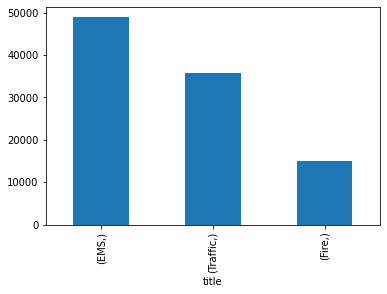

2. 
Jumlah Call - EMS


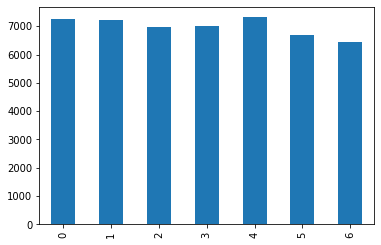

Jumlah Call - Traffic


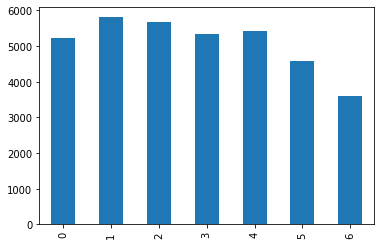

Jumlah Call - Fire


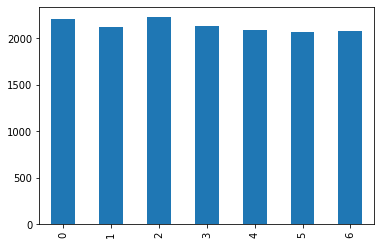

3. Jumlah total call per hari (senin sd minggu) dan per jam (00 - 23)


timeStamp_y  timeStamp
0            0            282
             1            221
             2            201
             3            194
             4            204
                         ... 
6            19           655
             20           537
             21           461
             22           415
             23           330
Length: 168, dtype: int64

4.


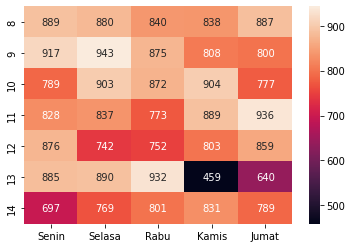

In [ ]:
from IPython.display import HTML
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
import numpy as np
import seaborn as sns 
% matplotlib inline

call_df = pd.read_csv("https://uph-datasets.s3-ap-southeast-1.amazonaws.com/call_data.csv")
# display(call_df)

# no 1 - jumlah call / reasons
print('1. Jumlah Call per "reason"')
df_reason = pd.DataFrame(call_df['title'].str.split(':').str[0])
print(df_reason.value_counts())
df_reason.value_counts().plot.bar()
plt.show()

# no 2 - grafis per tiap reason / senin-minggu
print('2. ')
# ems
print('Jumlah Call - EMS')
df_ems = call_df[call_df['title'].str.contains('EMS')]
df_ems_day = pd.to_datetime(df_ems['timeStamp'])
df_ems_day = df_ems_day.dt.weekday

df_ems_day.value_counts().sort_index().plot.bar()
plt.show()

# traffic
print('Jumlah Call - Traffic')
df_tr = call_df[call_df['title'].str.contains('Traffic')]
df_tr_day = pd.to_datetime(df_tr['timeStamp'])
df_tr_day = df_tr_day.dt.weekday

df_tr_day.value_counts().sort_index().plot.bar()
plt.show()

# fire
print('Jumlah Call - Fire')
df_fi = call_df[call_df['title'].str.contains('Fire')]
df_fi_day = pd.to_datetime(df_fi['timeStamp'])
df_fi_day = df_fi_day.dt.weekday

df_fi_day.value_counts().sort_index().plot.bar()
plt.show()

# 3 - day and time
print('3. Jumlah total call per hari (senin sd minggu) dan per jam (00 - 23)')
df_temp = pd.to_datetime(call_df['timeStamp'])
df_temp1 = df_temp.dt.weekday
df_temp2 = df_temp.dt.hour

# Merge by creating DataFrame from Series
new_df = call_df.merge(df_temp1.to_frame(), left_index=True, right_index=True)
new_df = new_df.merge(df_temp2.to_frame(), left_index=True, right_index= True)

call_dayhour_df = new_df.groupby(['timeStamp_y', 'timeStamp'])
call_dayhour_df = call_dayhour_df.size()
display(call_dayhour_df)

# 4 - heatmap
print('4.')
new_df = new_df[(new_df['timeStamp_y']>0) & (new_df['timeStamp_y']<6)] 
new_df = new_df[(new_df['timeStamp']>7) & (new_df['timeStamp']<15)]
call_dayhour_df = new_df.groupby(['timeStamp_y', 'timeStamp'])
call_dayhour_df1 = call_dayhour_df.size()

a = [8, 9, 10, 11, 12, 13, 14]
b = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat']
arr = call_dayhour_df1.values
reshaped = arr.reshape((7, 5))
df = pd.DataFrame(reshaped, index=a, columns=b)
sns.heatmap(df, annot=True, fmt='g')